<a href="https://colab.research.google.com/github/Anya-27/data-analysis/blob/main/Data__diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Анализ данных для прогнозирования диабета 🧬 🏥**

### *Исходные данные были взяты мною с kaggle* : https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

In [157]:
import pandas as pd # импортируем библиотеку pandas
import seaborn as sns # импортируем библиотеку seaborn
import matplotlib.pyplot as plt # импортируем библиотеку matplotlib

In [158]:
df = pd.read_csv('https://raw.githubusercontent.com/Anya-27/data-analysis/main/diabetes_prediction_dataset.csv')
# считываем данные

#### Для удобства использования данных dataset дадим расшифровку наименований столбцов ⬇:
-**gender** (пол)

-**age**  (возраст)

-**hypertension**  (гипертония: высокое артериальное давление)

-**heart_disease**  (болезни сердца)

-**smoking_history**  (история курения)

-**bmi**   (body mass index: индекс массы тела)

-**HbA1c_level**  (Уровень HbA1c (гемоглобин A1c) — это показатель среднего уровня сахара в крови человека за последние 2–3 месяца)

-**blood_glucose_level**  (уровень глюкозы в крови)

-**diabetes**  (наличие или отсутствие диабета)



## **Первичный анализ: ⏳**
---


In [159]:
df.info() # вывод ключевой информации о данном dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


*Данный dataframe имеет следующую размерность:*

In [160]:
df.shape # 100 000 строк и 9 столбцов

(100000, 9)

**Выведем основные статистические характеристики по каждому числовому признаку в данном dataframe с помощью метода describe:**

-count (кол-во наблюдений);

-mean (среднее значение);

-std (стандартное отклонение : мера разброса возле среднего значения);


-min (минимальное значение);

-25 % (значение до медианы 25%);

-50 % (медиана);

-75 % (значение после медианы 25%);

-max (максимальное значение).

In [ ]:
df.describe()

In [ ]:
df.head() # вывод первых 5-ти строк dataframe

In [ ]:
df.tail() # вывод последних 5-ти строк dataframe

## **Вывод по первичному анализу:**

Данный dataframe состоит из 100 тысяч строк и 9 столбцов. Изучив наименование столбцов, можно понять, что почти все они связаны с такой болезнью, как диабет, так как существуют столбцы с различными показателями, измеряемыми при риске возникновения диабета (например: уровень глюкозы в крови человека, уровень гемоглобина) у человека. Также существуют столбцы, связанные с некоторыми признаками образа жизни человека и самим человеком(по типу истории курения, гипертония, возраста, пола), тоже можно их использовать в дальнейшем анализе, и тд.

## **Подготовка данных для анализа:**

*Для корректного анализа данного dataframe удалим строки со значением 'Other' в столбце gender*

In [164]:
df=df[df['gender']!='Other']

*Исходя из первичного анализа, можно сделать вывод о том, что данный dataframe содержит как численные значения, так и строчные, а также отсутствуют строки со значениями NaN.*

## **Полноценный анализ 📊 💬 :**
---

### *В анализе данного dataframe я поставила себе **цель**:  выяснить, как различные заболевания, образ жизни и признаки способны повысить риск развития диабета у человека.*

### **1 вопрос:**
*Какое количество мужчин и женщин представленно в данном dataframe? Кого больше?*



Text(0.5, 1.0, 'Количество мужчин и женщин:')

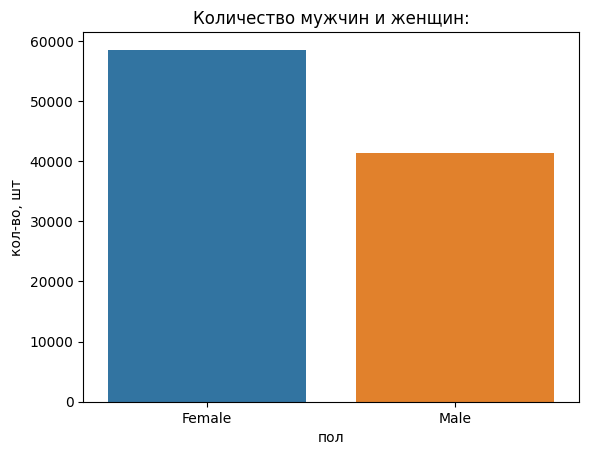

In [165]:
sns.countplot(data=df, x='gender')
plt.ylabel('кол-во, шт')
plt.xlabel('пол')
plt.title('Количество мужчин и женщин:')

**Делая вывод по 1 вопросу**, можно отметить, что большую часть в данном dataframe занимают женщины (примерно 59 тысяч человек), мужчин же 40 тысяч человек.

### **2 вопрос:**

Исходя из вышеполученных данных, определим:

*Существует ли зависимость, между гендерным признаком, возрастом и риском получения такого заболевания, как диабет?*

In [166]:
# для того, чтобы определить зависимость между этими признаками, создадим новый столбец gender_numbers с числовыми значениями в виде 1(если пол женский), 0(когда пол мужской)
df['gender_numbers'] = df.apply(lambda x: 1 if x['gender'] == 'Male' else 0, axis=1)


In [167]:
# далее, создадим новую таблицу, включающую 3 признака: пол, возраст, наличие диабета
df_cut=df[['age', 'gender_numbers', 'diabetes']]

In [168]:
# проверим, каковы индексы корреляции
df_cut.corr()

,age,gender_numbers,diabetes
age,1.000000,-0.030369,0.257999
gender_numbers,-0.030369,1.000000,0.037623
diabetes,0.257999,0.037623,1.000000


**Делая вывод по 2 вопросу**, можно отметить, что зависимость между возрастным признаком и наличием/отсутствием диабета минимальна, а между гендерным признаком и наличием/отсутствием диабета связи нет.

### **3 вопрос:**

*Проверим, действительно ли, высокое значение гемоглобина (показатель среднего уровня сахара в крови человека за последние 2–3 месяца) напрямую связанно с возникновением диабета ?*

In [169]:
# создадим новую таблицу, включающую 2 признака: гемоглобин и наличие/отутствие диабета
df_cut_2=df[['HbA1c_level', 'diabetes']]

In [170]:
# проверим, каковы индексы корреляции
df_cut_2.corr()

,HbA1c_level,diabetes
HbA1c_level,1.000000,0.400696
diabetes,0.400696,1.000000


Для более наглядного представления зависимости, приведем график, куда также включим возраст людей, так как из 2 второго вопроса мы увидели, что хотя бы минимальная зависимость между признаками возраст и диабет существует.

Text(0.5, 1.0, 'Зависимость между гемоглобином, возрастом и наличием диабета:')

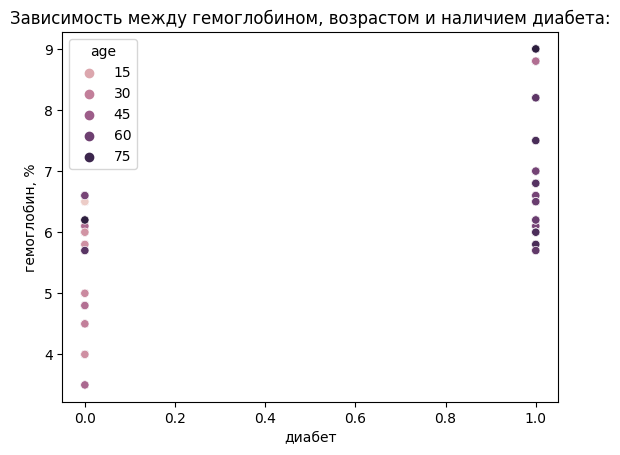

In [171]:
sns.scatterplot(data=df, x='diabetes', y='HbA1c_level', hue='age')
plt.ylabel('гемоглобин, %')
plt.xlabel('диабет')
plt.title('Зависимость между гемоглобином, возрастом и наличием диабета:')

**Вывод по 3 вопросу:** Коэффициенты корреляции показали, что зависимость между высоким значением гемоглобина и наличием диабета существует. Также, анализируя график, можно отметить, что те, кто отмечали повышенный уровень гемоглобина имеют такое заболевание как диабет, в основном это люди старшего возраста 60-75 лет.

###**4 вопрос:**

*Каково распределение уровня глюкозы в крови у людей с диабетом и без него?*

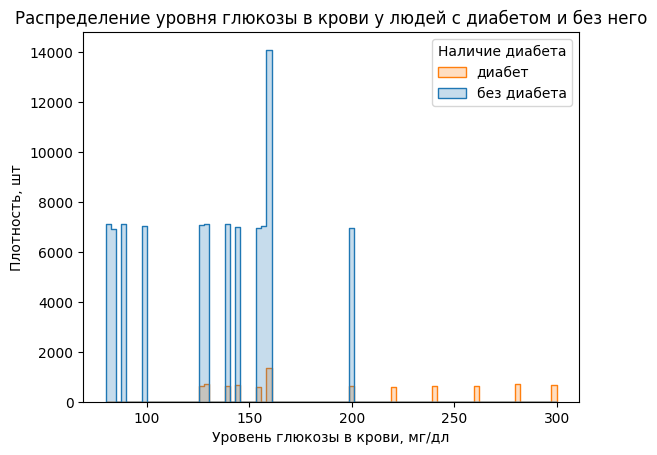

In [172]:
# Построим гистограмму распределения уровня глюкозы в крови
sns.histplot(data=df, x='blood_glucose_level', hue='diabetes', element='step')
plt.xlabel('Уровень глюкозы в крови, мг/дл')
plt.ylabel('Плотность, шт')
plt.title('Распределение уровня глюкозы в крови у людей с диабетом и без него')
plt.legend(['диабет', 'без диабета'], title='Наличие диабета')
plt.show()


**Делая вывод по 4 вопросу**, можно отметить, что риск получения такого заболевания, как диабет, увеличивается с повышением уровня глюкозы в крови.
На графике можно увидеть, что значения,свидетельствующие о наличие диабета, следуют стабильно после уровня глюкозы отметкой в 200.

### ***5:**
### **Дополнение ко 2 вопросу исходя из вывода, полученного в 4 вопросе:**

*Если внимательно проанализировать гистограмму в 4 вопросе, можно понять, почему во 2 вопросе корреляция между возрастом и наличием диабета получилась достаточно слабой, все дело в том, что количество значений в признаке диабет( -есть диабет и -нет диабета) далеко не одинаковое:*

Кол-во людей с диабетом составляет :

In [173]:
df[df['diabetes'] == 1].count()
# 8500 человек

gender                 8500
age                    8500
hypertension           8500
heart_disease          8500
smoking_history        8500
bmi                    8500
HbA1c_level            8500
blood_glucose_level    8500
diabetes               8500
gender_numbers         8500
dtype: int64

Кол-во людей без диабета составляет:

In [174]:
df[df['diabetes'] == 0].count()
# 91482 человек

gender                 91482
age                    91482
hypertension           91482
heart_disease          91482
smoking_history        91482
bmi                    91482
HbA1c_level            91482
blood_glucose_level    91482
diabetes               91482
gender_numbers         91482
dtype: int64

Если рассмотреть корреляцию с равным количеством строк в столбце диабет, можно получить более показательный результат:

In [175]:
df_diabetes = df[df['diabetes'] == 1]
df_non_diabetes = df[df['diabetes'] == 0].sample(8500)
df_union = pd.concat([df_diabetes, df_non_diabetes])

df_union[['age', 'diabetes', 'HbA1c_level']].corr()

,age,diabetes,HbA1c_level
age,1.000000,0.482018,0.292801
diabetes,0.482018,1.000000,0.600619
HbA1c_level,0.292801,0.600619,1.000000


 **Вывод по дополнению:**  Если взять равное количество строк, то есть людей, в этом случае, можно увидеть более правдоподобную, высокую зависимость между признаками возраст, гемоглобин и наличие диабета.


### **6 вопрос:**

*Проверим, каково процентное соотношение болезней сердца среди людей с диабетом?*

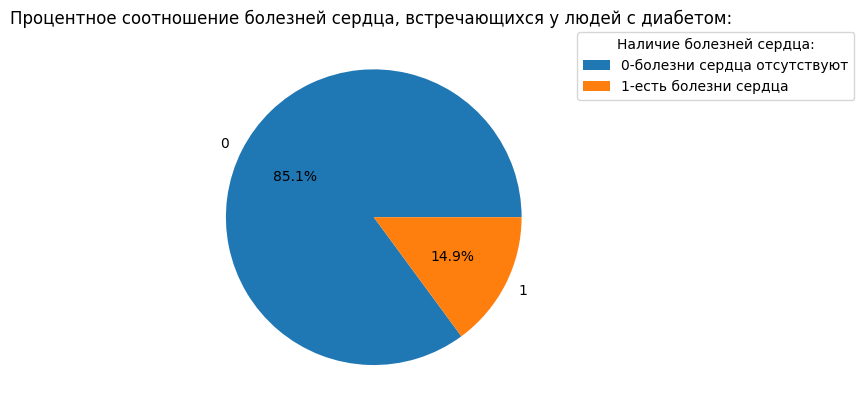

In [176]:
heart_disease_counts = df[df['diabetes'] == 1]['heart_disease'].value_counts()
plt.pie(heart_disease_counts, labels=heart_disease_counts.index, autopct='%1.1f%%')
plt.title('Процентное соотношение болезней сердца, встречающихся у людей с диабетом: ')
plt.legend(['0-болезни сердца отсутствуют', '1-есть болезни сердца'], title='Наличие болезней сердца:', bbox_to_anchor=( 1.05 , 1 ), loc='upper left', borderaxespad= 0)


**Делая вывод по 6 вопросу**, можно отметить, что болезни сердца не так сильно влияют на наличие диабета у человека. Смотря на график, мы видим, что большинство диабетиков не имеют болезней сердца.


### **7 вопрос:**

*Каково процентное содержание диабетиков среди каждой категории истории курения?*

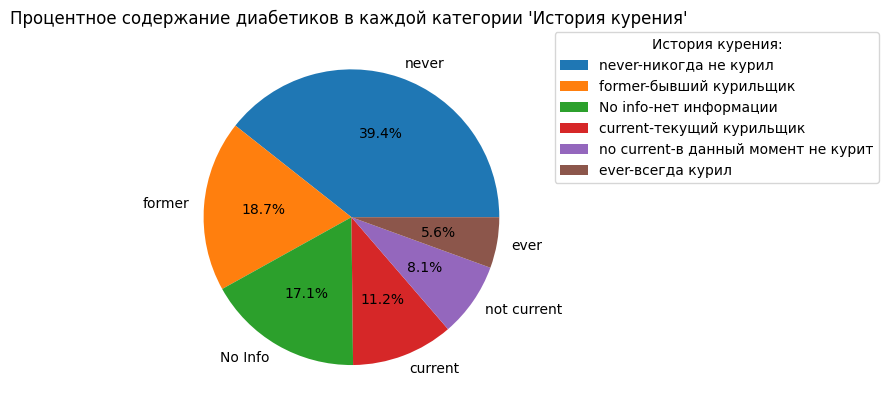

In [177]:
smoking_history_diabetes = df[df['diabetes'] == 1]['smoking_history'].value_counts()
plt.pie(smoking_history_diabetes, labels=smoking_history_diabetes.index, autopct='%1.1f%%')
plt.title('Процентное содержание диабетиков в каждой категории '"'История курения'"' ')
plt.legend (title='история курения')
plt.legend(['never-никогда не курил', 'former-бывший курильщик', 'No info-нет информации', 'current-текущий курильщик', 'no current-в данный момент не курит', 'ever-всегда курил'], title='История курения:', bbox_to_anchor=( 1.05 , 1 ), loc='upper left', borderaxespad= 0)


**Делая вывод по 7 вопросу**, можно отметить, что большинство диабетиков никогда не курили (39,4%), но при этом 18,7% из них бывшие курильщики и лишь 5,6% из них курили на протяжении всей жизни. Следовательно, мы можем сказать, что история курения, предположительно, не оказывает сильного влияния на наличие диабета, ведь большинство из опрошенных диабетиков никогда не употребляли табак, но все равно получили такое заболевание, как диабет.

# **Общий вывод: ✅**



-Большая часть данных в данном dataframe принадлежит к женскому полу (примерно 59 тысяч человек), в то время как количество мужчин составляет 40 тысяч человек.

-Анализ возрастного признака в связи с наличием/отсутствием диабета не показал значительной зависимости. Аналогично, не было обнаружено связи между гендерным признаком и наличием/отсутствием диабета.

-Однако, обнаружена зависимость между высоким уровнем гемоглобина и наличием диабета. Люди старшего возраста (60-75 лет), у которых отмечается повышенный уровень гемоглобина, имеют больший риск развития диабета.

-Риск развития диабета также увеличивается при повышенном уровне глюкозы в крови.

-Наличие болезней сердца не оказывает сильного влияния на наличие диабета у человека, так как большинство диабетиков не страдает от сердечных заболеваний.

-История курения представляется непринципиальной влияющим фактором на наличие диабета. Большинство диабетиков никогда не курили, однако небольшая доля представляет собой бывших или активных курильщиков.

В целом, данная сводка позволяет проанализировать связи и зависимости в dataframe и сделать некоторые общие выводы о риске и факторах, связанных с развитием диабета.